In [83]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read in a table with the Precursor MZ and Average measured Retention times
precursor_df = pd.read_csv('../data/SiteLocalization.csv')
precursor_df = precursor_df[precursor_df['Isotope Label Type'] == 'light']
precursor_df = precursor_df.drop(columns=['Transition', 'Product Mz', 'Isotope Label Type']).drop_duplicates()
precursor_df.head()

,Protein Name,Peptide Modified Sequence,Average Measured Retention Time,Precursor Mz
0,sp|Q16777|H2A2C_HUMAN,G[+56]K[+42]QGGK[+42]AR,20.93,941.516305
34,sp|Q16777|H2A2C_HUMAN,G[+56]K[+42]QGGK[+42]AR,20.93,471.261791
92,sp|Q16777|H2A2C_HUMAN,G[+56]K[+56]QGGK[+42]AR,17.10,955.531955
126,sp|Q16777|H2A2C_HUMAN,G[+56]K[+56]QGGK[+42]AR,17.10,478.269616
186,sp|Q16777|H2A2C_HUMAN,G[+56]K[+42]QGGK[+56]AR,17.05,955.531955


In [85]:
# create MZ bins based on DIA windowing schemes
windows_lkp_df = pd.read_excel("../data/histone_isowindow_300-1100_75x11mzol.xlsx")
windows_ss_df = pd.read_excel("../data/histone_isowindow_300-1100_16x50mz.xlsx")

window_bins_lkp = sorted(list(windows_lkp_df['Start m/z']))
window_bins_lkp.append(sorted(windows_lkp_df['Stop m/z'])[-2])
window_bins_lkp.append(sorted(windows_lkp_df['Stop m/z'])[-1])
window_bins_lkp = sorted(window_bins_lkp)  # sorted list of the MZ bins

window_bins_ss = sorted(list(windows_ss_df['Start m/z']))
window_bins_ss.append(sorted(windows_ss_df['Stop m/z'])[-2])
window_bins_ss.append(sorted(windows_ss_df['Stop m/z'])[-1])
window_bins_ss = sorted(window_bins_ss)  # sorted list of the MZ bins

# determine RT bins based on range of measured RT and a ~30 second bin width
rt_seconds = (max(precursor_df['Average Measured Retention Time']) - min(precursor_df['Average Measured Retention Time']))*60
sys.stdout.write("Number of bins for 30s RT: %f\n" % (rt_seconds/30) )  # divide total RT range by 30 seconds to get # of bins

Number of bins for 30s RT: 86.620000


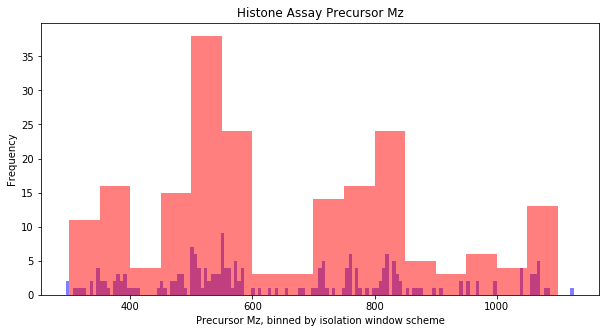

In [86]:
plt.figure(figsize=(10,5))
plt.hist(precursor_df['Precursor Mz'], bins=window_bins_lkp, alpha=0.5, color="blue")
plt.hist(precursor_df['Precursor Mz'], bins=window_bins_ss, alpha=0.5, color="red")
plt.title("Histone Assay Precursor Mz")
plt.xlabel("Precursor Mz, binned by isolation window scheme")
plt.ylabel("Frequency")
plt.show()

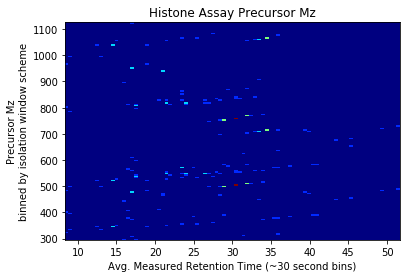

In [92]:
plt.hist2d(y=precursor_df['Precursor Mz'], 
           x=precursor_df['Average Measured Retention Time'], 
           bins=(87, window_bins_lkp), cmap=plt.cm.jet)
plt.title("Histone Assay Precursor Mz")
plt.ylabel("Precursor Mz\nbinned by isolation window scheme")
plt.xlabel("Avg. Measured Retention Time (~30 second bins)")
plt.show()

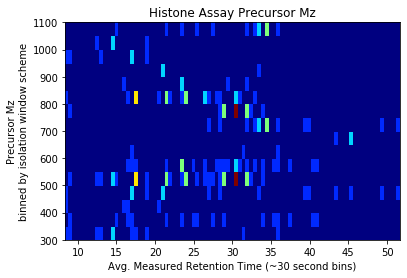

In [93]:
plt.hist2d(y=precursor_df['Precursor Mz'], 
           x=precursor_df['Average Measured Retention Time'], 
           bins=(87, window_bins_ss), cmap=plt.cm.jet)
plt.title("Histone Assay Precursor Mz")
plt.ylabel("Precursor Mz\nbinned by isolation window scheme")
plt.xlabel("Avg. Measured Retention Time (~30 second bins)")
plt.show()